In [14]:
import random 
from numpy import genfromtxt
import numpy as np
import pandas as pd
from collections import deque
import matplotlib
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('data/[1h]BTCUSDT.csv')
df2 = pd.read_csv('data/[1h]BTCUSDT.csv')
print(df)

               Start           Stop      Open     Close       Low      High  \
0      1502942400000  1502945999999   4261.48   4308.83   4261.32   4313.62   
1      1502946000000  1502949599999   4308.83   4315.32   4291.37   4328.69   
2      1502949600000  1502953199999   4330.29   4324.35   4309.37   4345.45   
3      1502953200000  1502956799999   4316.62   4349.99   4287.41   4349.99   
4      1502956800000  1502960399999   4333.32   4360.69   4333.32   4377.85   
...              ...            ...       ...       ...       ...       ...   
29471  1609444800000  1609448399999  28897.84  29126.70  28862.00  29139.65   
29472  1609448400000  1609451999999  29126.71  28966.36  28900.79  29169.55   
29473  1609452000000  1609455599999  28966.36  29100.84  28910.19  29143.73   
29474  1609455600000  1609459199999  29100.83  28923.63  28780.00  29110.35   
29475  1609459200000  1609462799999  28923.63  28995.13  28690.17  29031.34   

            Volume  
0        47.181009  
1        

In [16]:
index = [x for x in range(0, len(df["Open"]))]

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Open'), Text(0.5, 1.0, 'First plot')]

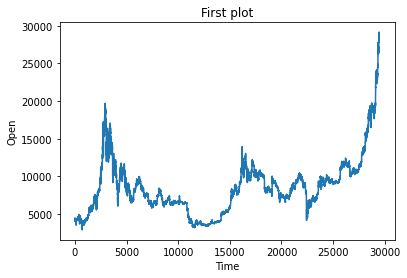

In [17]:
fig, ax = plt.subplots()
ax.plot(index, df["Open"])
ax.set(xlabel='Time', ylabel='Open',
       title='First plot')

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Per Day Difference')]

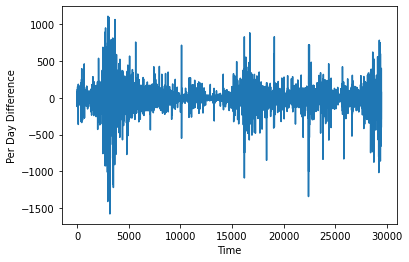

In [18]:
delta_day = []
for i in range(len(df["Open"])):
    delta_day.append(df["Close"][i] - df["Open"][i])
fig, ax = plt.subplots()
ax.plot(index, delta_day)
ax.set(xlabel='Time', ylabel='Per Day Difference')

In [19]:
from statsmodels.tsa.ar_model import AutoReg

In [54]:
number_of_predictions = 30
data = df["Close"]
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
autoreg_prediction = model_fit.predict(len(data), len(data)+number_of_predictions-1) 

e:\python\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


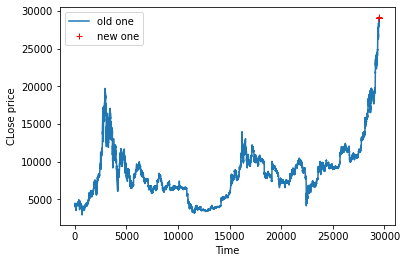

In [55]:
new_index = [(index[-1] + x) for x in range(number_of_predictions)]
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,autoreg_prediction,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

In [47]:
from statsmodels.tsa.arima.model import ARIMA

In [56]:
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
arima_prediction = model_fit.predict(len(data), len(data)+number_of_predictions-1)

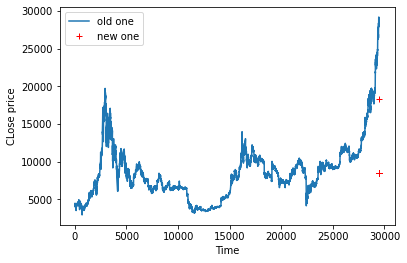

In [57]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,arima_prediction,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

In [59]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [64]:
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
simle_exp_prediction = model_fit.predict(len(data), len(data)+number_of_predictions-1)

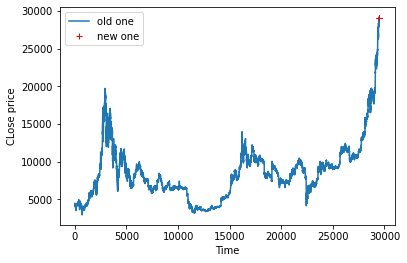

In [61]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,simle_exp_prediction,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [72]:
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
holt_exp_prediction = model_fit.predict(len(data), len(data)+number_of_predictions-1)

e:\python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


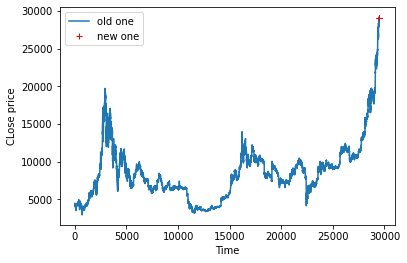

In [66]:
fig, ax = plt.subplots()
line1, = ax.plot(index, df["Close"],label="old one")
line2, = ax.plot(new_index,holt_exp_prediction,'r+',label="new one")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()

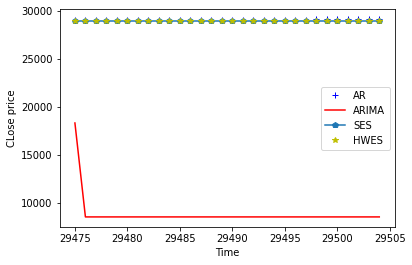

In [71]:
fig, ax = plt.subplots()
line1, = ax.plot(new_index,autoreg_prediction,'b+',label="AR")
line2, = ax.plot(new_index,arima_prediction,'r',label="ARIMA")
line3, = ax.plot(new_index,simle_exp_prediction,'p-',label="SES")
line4, = ax.plot(new_index,holt_exp_prediction,'y*',label="HWES")
ax.set(xlabel='Time', ylabel='CLose price')
ax.legend()
plt.show()